MNIST dataset Labels  
Label	Class  
0   ---->	 T-shirt/top  
1	---->    Trouser  
2	---->    Pullover  
3	---->    Dress  
4	---->    Coat  
5	---->    Sandal  
6	---->    Shirt  
7	---->    Sneaker  
8	---->    Bag  
9	 ---->   Ankle boot  

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
print("Imported Sucessfully")

Imported Sucessfully


Loading Dataset from Keras API


In [42]:
mnist=tf.keras.datasets.fashion_mnist
type(mnist)

tensorflow.python.util.deprecation_wrapper.DeprecationWrapper

Splitting into training and testing data

In [8]:
(training_images, training_labels),(testing_images, testing_labels) = mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


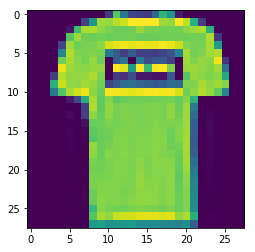

In [20]:
plt.imshow(training_images[1])

In [14]:
print(training_labels[1])

0


In [21]:
print(training_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

Normalization

In [23]:
training_images=training_images/255.0
testing_images=testing_images/255.0

Design The Model

In [35]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [36]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

In [37]:
model.fit(training_images,training_labels,epochs=15)

Epoch 1/15
60000/60000 [==============================] - 6s 103us/sample - loss: 0.8109 - acc: 0.6980
Epoch 2/15
60000/60000 [==============================] - 7s 121us/sample - loss: 0.5361 - acc: 0.8063
Epoch 3/15
60000/60000 [==============================] - 10s 169us/sample - loss: 0.4704 - acc: 0.8302
Epoch 4/15
60000/60000 [==============================] - 10s 173us/sample - loss: 0.4337 - acc: 0.8434
Epoch 5/15
60000/60000 [==============================] - 9s 149us/sample - loss: 0.4073 - acc: 0.8511
Epoch 6/15
60000/60000 [==============================] - 9s 151us/sample - loss: 0.3894 - acc: 0.8578
Epoch 7/15
60000/60000 [==============================] - 10s 169us/sample - loss: 0.3721 - acc: 0.8640
Epoch 8/15
60000/60000 [==============================] - 9s 156us/sample - loss: 0.3572 - acc: 0.8690
Epoch 9/15
60000/60000 [==============================] - 10s 170us/sample - loss: 0.3462 - acc: 0.8719
Epoch 10/15
60000/60000 [==============================] - 10s 173us/

Model's Accuracy on training data = 88.73%  
Now lets test the Model

In [38]:
model.evaluate(testing_images,testing_labels)

10000/10000 [==============================] - 1s 104us/sample - loss: 67.1755 - acc: 0.7396


[67.17550702514649, 0.7396]

Model's Accuracy on testing data = 73.96%

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  100480    
_________________________________________________________________
dense_3 (Dense)              multiple                  16512     
_________________________________________________________________
dense_4 (Dense)              multiple                  16512     
_________________________________________________________________
dense_5 (Dense)              multiple                  1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________
